In [16]:
# z5522942
# Yuji Mao
# 9414 assn2

In [72]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("Taxi-v3", render_mode="ansi")
state_info = env.reset()
state = state_info

rendered_env = env.render()
print(rendered_env)

n_states = env.observation_space.n
n_actions = env.action_space.n

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




In [73]:
# Q-table to store state-action pair
Q = np.zeros([n_states, n_actions])
rewards = []
steps = []

In [74]:
# Action selection function (epsilon-greedy)
def action_selection(Q, state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q[state])

In [75]:
# hyperparameters for Q-learning
alpha = 0.1  # learning rate
gamma = 0.95  # discount factor
epsilon = 0.1  # exploration rate
epsilon_min = 0.01  # minimum exploration rate
epsilon_decay = 0.999  # decay rate for exploration
episodes = 6000

# Q-learning training loop 
for episode in range(1, episodes + 1):
    state_info = env.reset()
    state = state_info[0]
    done = False
    G, reward = 0, 0
    step_count = 0

    while not done:
        # initial action
        action = action_selection(Q, state, epsilon)

        next_state, reward, done, truncated, info = env.step(action)

        # update Q table
        old_value = Q[state, action]
        next_max = np.max(Q[next_state])
        Q[state, action] = old_value + alpha * (reward + gamma * next_max - old_value)

        state = next_state
        step_count += 1
        G += reward

    rewards.append(G)
    steps.append(step_count)

    # decay epsilon shift from exploration to exploitation over time
    if epsilon > epsilon_min:
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
    
    # print training progress
    if episode % 100 == 0:
        avg_reward = np.mean(rewards[-100:])
        avg_steps = np.mean(steps[-100:])
        print(f"Q-learning - Episode: {episode}, Avg Reward: {avg_reward:.2f}, Steps: {avg_steps}")

Q-learning - Episode: 100, Avg Reward: -605.76, Steps: 398.07
Q-learning - Episode: 200, Avg Reward: -185.72, Steps: 150.2
Q-learning - Episode: 300, Avg Reward: -108.12, Steps: 96.09
Q-learning - Episode: 400, Avg Reward: -62.27, Steps: 63.02
Q-learning - Episode: 500, Avg Reward: -48.01, Steps: 52.81
Q-learning - Episode: 600, Avg Reward: -26.24, Steps: 35.9
Q-learning - Episode: 700, Avg Reward: -14.28, Steps: 28.8
Q-learning - Episode: 800, Avg Reward: -10.34, Steps: 25.94
Q-learning - Episode: 900, Avg Reward: -4.10, Steps: 21.41
Q-learning - Episode: 1000, Avg Reward: -0.54, Steps: 19.29
Q-learning - Episode: 1100, Avg Reward: 0.65, Steps: 17.47
Q-learning - Episode: 1200, Avg Reward: 3.08, Steps: 16.12
Q-learning - Episode: 1300, Avg Reward: 3.58, Steps: 15.8
Q-learning - Episode: 1400, Avg Reward: 4.80, Steps: 14.58
Q-learning - Episode: 1500, Avg Reward: 5.22, Steps: 14.25
Q-learning - Episode: 1600, Avg Reward: 6.09, Steps: 13.74
Q-learning - Episode: 1700, Avg Reward: 4.65, 

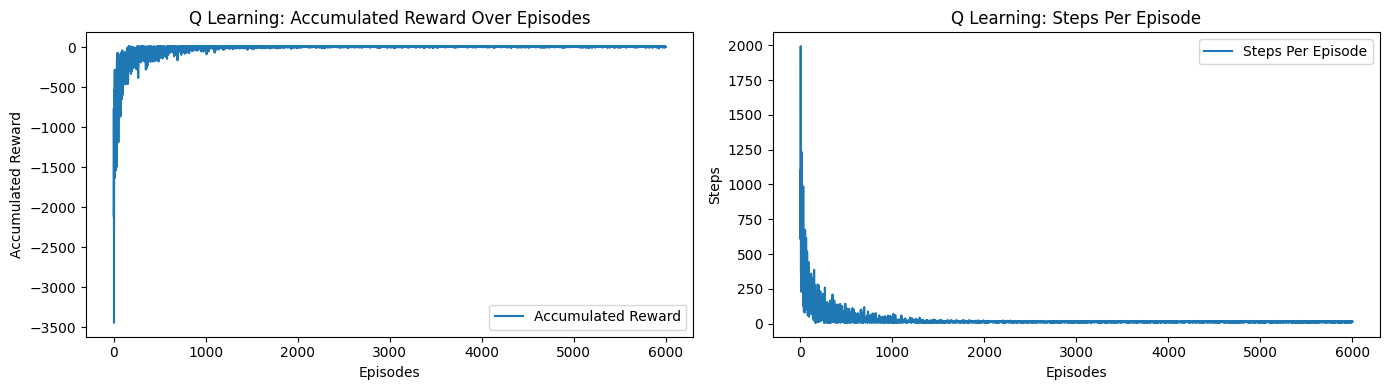

In [76]:
# print result
plt.figure(figsize=(14, 4))

# accumulated rewards
plt.subplot(1, 2, 1)
plt.plot(range(episodes), rewards, label='Accumulated Reward')
plt.xlabel('Episodes')
plt.ylabel('Accumulated Reward')
plt.title('Q Learning: Accumulated Reward Over Episodes')
plt.legend()

# steps per episode
plt.subplot(1, 2, 2)
plt.plot(range(episodes), steps, label='Steps Per Episode')
plt.xlabel('Episodes')
plt.ylabel('Steps')
plt.title('Q Learning: Steps Per Episode')
plt.legend()

plt.tight_layout()
plt.show()


In [77]:
# visualize the first six steps for trained model
def visualize_steps(env, Q, epsilon):
    state_info = env.reset()
    state = state_info[0]
    done = False
    G, reward = 0, 0
    step_count = 0

    print(f"Initial State:\n{env.render()}")

    while not done and step_count < 6:
        action = action_selection(Q, state, epsilon)
        next_state, reward, done, truncated, info = env.step(action)
        G += reward

        print(f"Step: {step_count}")
        print(f"State: {state}, Action: {action}, Reward: {reward}, Total Accumulated Reward: {G}")
        print(env.render())
        
        state = next_state
        step_count += 1

visualize_steps(env, Q, epsilon)

Initial State:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


Step: 0
State: 364, Action: 2, Reward: -1, Total Accumulated Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Step: 1
State: 384, Action: 1, Reward: -1, Total Accumulated Reward: -2
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Step: 2
State: 284, Action: 1, Reward: -1, Total Accumulated Reward: -3
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Step: 3
State: 184, Action: 1, Reward: -1, Total Accumulated Reward: -4
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Step: 4
State: 84, Action: 4, Reward: -1, Total Accumulated Reward: -5
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

Step: 5
State: 96, Action: 3, Reward: -1, Total Accumulated Rewar

In [78]:
# Q-learning testing
import numpy as np
import gym
import pickle

with open("q_table_QL.pkl", "rb") as f:
    Q = pickle.load(f)

env = gym.make("Taxi-v3", render_mode="ansi")

# testing hyperparameters
test_episodes = 100
max_steps = 100

total_rewards = []
total_steps = []

def greedy_action_selection(Q, state):
    return np.argmax(Q[state])

# Testing loop
for episode in range(test_episodes):
    state_info = env.reset()
    state = state_info[0]
    done = False
    total_reward = 0
    step_count = 0
    
    while not done and step_count < max_steps:
        action = greedy_action_selection(Q, state)
        
        next_state, reward, done, truncated, info = env.step(action)
        
        state = next_state
        total_reward += reward
        step_count += 1
    
    total_rewards.append(total_reward)
    total_steps.append(step_count)

average_reward = np.mean(total_rewards)
average_steps = np.mean(total_steps)

print(f"Average Reward: {average_reward:.2f}")
print(f"Average Steps: {average_steps:.2f}")

# visualization for QL training outcomes
def visualize_agent(Q, env):
    state_info = env.reset()
    state = state_info[0]
    done = False
    total_reward = 0
    step_count = 0
    
    print("Initial State:")
    print(env.render())
    
    while not done:
        action = greedy_action_selection(Q, state)
        
        next_state, reward, done, truncated, info = env.step(action)
        
        total_reward += reward
        step_count += 1
        
        print(f"Step: {step_count}")
        print(env.render())
        print(f"State: {state}, Action: {action}, Reward: {reward}, Total Accumulated Reward: {total_reward}\n")
        
        state = next_state

visualize_agent(Q, env)


Average Reward: 6.73
Average Steps: 14.06
Initial State:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


Step: 1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

State: 409, Action: 4, Reward: -1, Total Accumulated Reward: -1

Step: 2
+---------+
|R: | : :G|
| : | : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (North)

State: 417, Action: 1, Reward: -1, Total Accumulated Reward: -2

Step: 3
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

State: 317, Action: 1, Reward: -1, Total Accumulated Reward: -3

Step: 4
+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

State: 217, Action: 2, Reward: -1, Total Accumulated Reward: -4

Step: 5
+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

State: 237, Action: 2, Reward: -1, Total Accumulated Reward: -5

Step: 6
+---------

In [79]:
import pickle

# Save Q-table
with open('q_table_QL.pkl', 'wb') as f:
    pickle.dump(Q, f)

In [80]:
# reinitialize Q-table
Q = np.zeros([n_states, n_actions])
rewards = []
steps = []

In [81]:
# hyperparameters for SARSA
alpha = 0.05 # lower learning rate for stability
alpha_min = 0.01
alpha_decay = 0.9999
gamma = 0.97  # higher discount factor for long-term rewards
epsilon = 1.0  # initial exploration rate
epsilon_min = 0.01  # minimum exploration rate
epsilon_decay = 0.995  # decay rate for exploration
episodes = 7000

# SARSA training loop
# similar to Q-learning but change to SARSA formula
for episode in range(1, episodes + 1):
    state_info = env.reset()
    state = state_info[0]
    done = False
    G, reward = 0, 0
    step_count = 0

    action = action_selection(Q, state, epsilon)

    while not done:
        next_state, reward, done, truncated, info = env.step(action)

        next_action = action_selection(Q, next_state, epsilon)

        old_value = Q[state, action]
        Q[state, action] = old_value + alpha * (reward + gamma * Q[next_state, next_action] - old_value)

        state = next_state
        action = next_action
        step_count += 1
        G += reward

    rewards.append(G)
    steps.append(step_count)

    # shift focus from exploration to exploitation over time
    if epsilon > epsilon_min:
        epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # stabilize learning
    if alpha > alpha_min:
        alpha = max(alpha_min, alpha * alpha_decay)

    # print training progress
    if episode % 100 == 0:
        avg_reward = np.mean(rewards[-100:])
        avg_steps = np.mean(steps[-100:])
        print(f"SARSA - Episode: {episode}, Avg Reward: {avg_reward:.2f}, Steps: {avg_steps}")

SARSA - Episode: 100, Avg Reward: -3229.51, Steps: 932.74
SARSA - Episode: 200, Avg Reward: -648.70, Steps: 276.94
SARSA - Episode: 300, Avg Reward: -279.25, Steps: 163.54
SARSA - Episode: 400, Avg Reward: -114.91, Steps: 91.99
SARSA - Episode: 500, Avg Reward: -88.42, Steps: 84.49
SARSA - Episode: 600, Avg Reward: -71.83, Steps: 78.25
SARSA - Episode: 700, Avg Reward: -46.77, Steps: 60.3
SARSA - Episode: 800, Avg Reward: -26.75, Steps: 44.6
SARSA - Episode: 900, Avg Reward: -25.01, Steps: 44.03
SARSA - Episode: 1000, Avg Reward: -18.55, Steps: 38.92
SARSA - Episode: 1100, Avg Reward: -13.54, Steps: 34.0
SARSA - Episode: 1200, Avg Reward: -12.47, Steps: 32.12
SARSA - Episode: 1300, Avg Reward: -12.93, Steps: 33.03
SARSA - Episode: 1400, Avg Reward: -7.85, Steps: 28.04
SARSA - Episode: 1500, Avg Reward: -5.69, Steps: 26.33
SARSA - Episode: 1600, Avg Reward: -3.87, Steps: 24.15
SARSA - Episode: 1700, Avg Reward: -1.28, Steps: 21.74
SARSA - Episode: 1800, Avg Reward: 3.66, Steps: 17.07
SA

In [82]:
#visualize_steps(env, Q, epsilon)

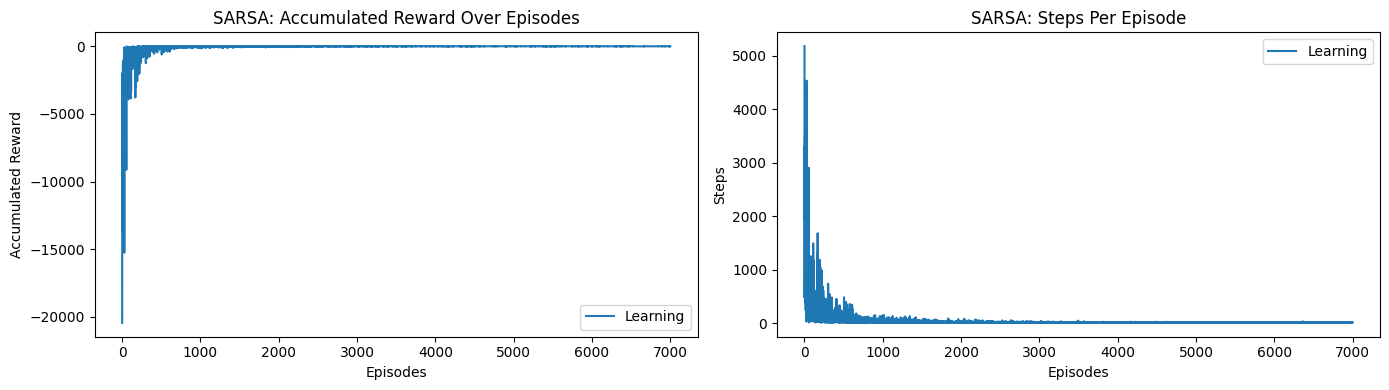

In [83]:
# print result
plt.figure(figsize=(14, 4)) 

# accumulated rewards
plt.subplot(1, 2, 1)
plt.plot(range(episodes), rewards, label='Learning')
plt.xlabel('Episodes')
plt.ylabel('Accumulated Reward')
plt.title('SARSA: Accumulated Reward Over Episodes')
plt.legend()

# steps per episode
plt.subplot(1, 2, 2)
plt.plot(range(episodes), steps, label='Learning')
plt.xlabel('Episodes')
plt.ylabel('Steps')
plt.title('SARSA: Steps Per Episode')
plt.legend()

plt.tight_layout()
plt.show()

In [84]:
with open('q_table_SARSA.pkl', 'wb') as f:
    pickle.dump(Q, f)

In [85]:
# SARSA testing
import numpy as np
import gym
import pickle

with open("q_table_SARSA.pkl", "rb") as f:
    Q = pickle.load(f)

env = gym.make("Taxi-v3", render_mode="ansi")

# testing hyperparameters
test_episodes = 100
max_steps = 100

total_rewards = []
total_steps = []

def greedy_action_selection(Q, state):
    return np.argmax(Q[state])

for episode in range(test_episodes):
    state_info = env.reset()
    state = state_info[0]
    done = False
    total_reward = 0
    step_count = 0
    
    while not done and step_count < max_steps:
        action = greedy_action_selection(Q, state)
        
        next_state, reward, done, truncated, info = env.step(action)
        
        state = next_state
        total_reward += reward
        step_count += 1
    
    total_rewards.append(total_reward)
    total_steps.append(step_count)

average_reward = np.mean(total_rewards)
average_steps = np.mean(total_steps)

print(f"Average Reward: {average_reward:.2f}")
print(f"Average Steps: {average_steps:.2f}")

# visualization for SARSA training result
def visualize_agent(Q, env):
    state_info = env.reset()
    state = state_info[0]
    done = False
    total_reward = 0
    step_count = 0
    
    print("Initial State:")
    print(env.render())
    
    while not done:
        action = greedy_action_selection(Q, state)
        
        next_state, reward, done, truncated, info = env.step(action)
        
        total_reward += reward
        step_count += 1
        
        print(f"Step: {step_count}")
        print(env.render())
        print(f"State: {state}, Action: {action}, Reward: {reward}, Total Accumulated Reward: {total_reward}\n")
        
        state = next_state

visualize_agent(Q, env)


Average Reward: 6.48
Average Steps: 14.31
Initial State:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


Step: 1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

State: 189, Action: 3, Reward: -1, Total Accumulated Reward: -1

Step: 2
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

State: 169, Action: 3, Reward: -1, Total Accumulated Reward: -2

Step: 3
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

State: 149, Action: 0, Reward: -1, Total Accumulated Reward: -3

Step: 4
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

State: 249, Action: 3, Reward: -1, Total Accumulated Reward: -4

Step: 5
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

State: 229, Action: 3, Reward: -1, Total Accumulated Reward: -5

Step: 6
+---------+
|